In [168]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú

import requests
from bs4 import BeautifulSoup as bs
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import matplotlib as mpl
print('matplotlib ' + mpl.__version__)

matplotlib 3.2.2


In [3]:
# Îß∑ÌîåÎ°ØÎ¶Ω ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ï
import platform
from matplotlib import font_manager, rc

# ÌïúÍ∏Ä ÏÑ§Ï†ïÏãú ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®ÏßÄÎäî Í≤É Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. ÌÅ¨Î°§Îü¨ Íµ¨Ï∂ï (Í∞Å ÏÇ¨Ïù¥Ìä∏Ïóê ÎßûÎäî ÌÅ¨Î°§Îü¨ Íµ¨Ï∂ï ÌõÑ ÌÜµÌï©)

In [4]:
# ÏóêÏñ¥ÎπÑÏï§ÎπÑ,Ìò∏ÌÖîÏä§Îã∑Ïª¥,Ïó¨Í∏∞Ïñ¥Îïå,Î∂ÄÌÇπÎã∑Ïª¥ ÌÅ¨Î°§ÎßÅ ÏΩîÎìú 

class Hotel:
    def __init__ (self,place,checkin,checkout,pages):
        self.place=place
        self.checkin=checkin
        self.checkout=checkout
        self.pages=pages
        
#airbnb ÌÅ¨Î°§ÎßÅ
    def airbnb(self):  #place = Ïû•ÏÜå, checkin = Ï≤¥ÌÅ¨Ïù∏ ÎÇ†Ïßú, checkout :Ï≤¥ÌÅ¨ÏïÑÏõÉ ÎÇ†Ïßú, pages=Í≤ÄÏÉâÌïòÍ≥†Ïûê ÌïòÎäî ÌéòÏù¥ÏßÄ Ïàò
    
    
        result_list=[]  #ÌÅ¨Î°§ÎßÅ ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏

        #ÏóêÏñ¥ÎπÑÏï§ÎπÑÎäî offsetÏù¥ 20Îã®ÏúÑÎ°ú ÌéòÏù¥ÏßÄÍ∞Ä Î≥ÄÌôî ex)offset 0 : 1ÌéòÏù¥ÏßÄ , offset 1~20: 2ÌéòÏù¥ÏßÄ 
        for page in range(1,self.pages+1): #ÏûÖÎ†•Î∞õÏùÄ ÌéòÏù¥ÏßÄ ÏàòÎßåÌÅº Î™®Îëê ÌÅ¨Î°§ÎßÅ ÌïòÍ∏∞ ÏúÑÌï¥
            if page==1:  #pageÍ∞Ä 1Ïù¥Î©¥ offset=0
                offset=0
            else:
                offset=page*20  #1Î≥¥Îã§ ÌÅ¨Î©¥ page*20


            #Î¶¨ÌÄòÏä§Ìä∏Ìï† urlÍ≥º ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
            base_url="https://www.airbnb.co.kr/s/%s/homes" %self.place
            params={'query': [self.place],
             'federated_search_session_id': ['e296e38b-6ec1-4296-9a81-f762cfb2c92a'],
             'source': ['structured_search_input_header'],
             'search_type': ['pagination'],
             'tab_id': ['home_tab'],
             'checkin': [self.checkin],
             'refinement_paths[]': ['/homes'],
             'checkout': [self.checkout],
             'section_offset': ['2'],
             'items_offset': [offset]}

            resp=requests.get(base_url,params=params)
            soup=bs(resp.text)
            item_tags=soup.select("#FMP-target > div > div > div > div")
            len(item_tags[0])


            #Ìï¥Îãπ ÏàôÏÜåÏóê ÎåÄÌïú ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄ urlÏùÑ Í∞ÄÏ†∏Ïò¥
            a_tags=item_tags[0].find_all("a")
            url_list=[]
            for i in a_tags:
                url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


            #ÏàôÏÜåÎì§Ïùò Í∞ÄÍ≤©Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏Ïò¥
            price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
            price_list=[]
            for i in price_tags:
                try:
                    price=i.text.split(":")[2]
                except:
                    price=i.text.split(":")[1]
                price=price.replace("‚Ç©","")
                price=price.replace(",","")
                price_list.append(float(price))
    
            #ÏàôÏÜåÎì§Ïùò Î¶¨Î∑∞ Í∞úÏàòÎ•º Í∞ÄÏ†∏Ïò¥
            count_reviews=item_tags[0].find_all("span",class_="_krjbj")
            count_reviews
            count_reviews_list=[]
            for i in count_reviews:
                if "ÌõÑÍ∏∞" in str(i):
                    count_reviews_list.append(i.text.split(" ")[1].replace("Í∞ú",""))

            #ÏàôÏÜåÎì§Ïùò Ïù¥Î¶ÑÍ≥º ÌèâÏ†êÏùÑ Í∞ÄÏ†∏Ïò¥
            name_tags=item_tags[0].find_all("div",class_="_bzh5lkq")
            rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")

            result=[]

            #ÏïûÏóêÏÑú Ï∂îÏ∂úÌïú Ï†ïÎ≥¥Îì§ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Ìôî ÌïòÏó¨ result Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            for n,r,p,c in zip(name_tags,rate_tags,price_list,count_reviews_list):
                result.append({
                    "Ïù¥Î¶Ñ":n.text,
                    "ÌèâÏ†ê":float(r.text),
                    "Î¶¨Î∑∞ Í∞úÏàò" :int(c),
                    "Í∞ÄÍ≤©":int(p),
                    "ÏÇ¨Ïù¥Ìä∏":"AirBnb"
                })
            for item in result:
                if item["Ïù¥Î¶Ñ"] not in result_list:
                    result_list.append(item)



        #ÏµúÏ†Ä Í∞ÄÍ≤© ÏàôÏÜå / ÏµúÍ≥† ÌèâÏ†ê ÏàôÏÜå Íµ¨ÌïòÍ∏∞            
        min_price=1000000
        name_of_min_price=""
        min_url=""

        highest_rate=0.00
        name_of_hr=""
        highest_url=""

        for item in result_list:
            price=item["Í∞ÄÍ≤©"]
#             price=price.replace("‚Ç©","")
#             price=float(price.replace(",",""))

            if price<min_price:
                min_price=price
                name_of_min_price=item["Ïù¥Î¶Ñ"]
#                 min_url=item["ÎßÅÌÅ¨"]

            rate=float(item["ÌèâÏ†ê"])
            if rate>highest_rate:
                highest_rate=rate
                name_of_hr=item["Ïù¥Î¶Ñ"]
#                 highest_url=item["ÎßÅÌÅ¨"]


        return result_list,"ÏµúÏ†Ä Í∞ÄÍ≤© ÏàôÏÜå : %s (Í∞ÄÍ≤© : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"ÏµúÍ≥† ÌèâÏ†ê ÏàôÏÜå : %s (ÌèâÏ†ê : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)

# #Ìò∏ÌÖîÏä§Îã∑Ïª¥
    
#     def hotels(self):

#         result_list=[]
#         for page in range(1,self.pages+1):

#             base_url='https://kr.hotels.com/search/listings.json'
#             params={
#                 #'pg-offset':page,
#                 #'distination-id':'1644457', 
#                 'q-check-in':self.checkin,
#                 'q-destination':self.place,
#                 'q-check-out':self.checkout,
#                 'q-rooms':1,
#                 'q-room-0-adults':1,
#                 'q-room-0-children':0,
#                 'pg':1,
#                 #'start-index':1,
#                 'pn':page,
#                 #'resolved-location':'REGION:1644457:UNKNOWN:UNKNOWN'
#             }

#             headers={
#                 'content-type': 'application/javascript',
#                 'x-requested-with': 'XMLHttpRequest',
#                 #'referer':'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&destination-id=1644457&q-destination={0}&q-check-in=2020-08-16&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=1&q-room-0-children=0'.format(urllib.parse.quote('Ï†úÏ£ºÎèÑ')),
#                 'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
#                 'cookie': "asc=1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; guid=8c8ca612-b270-42cb-95aa-6232c2538458; user=QSprb19LUnxIQ09NX0tS; dr=AAA~1596523818~5C85BBDD535AE5EBF43E87FBF3ED905266EB65950AFBFD78AC0671363A77CA79; akacd_pr_20=1601707820~rv=31~id=44ca8f82368ff8df2ac1cef34c3ccc77; bm_sz=91F45291ECCBD9CF669AE98B49CA6C7D~YAAQa3pGaFBIOoBzAQAALzY8uAjOZf4bEil+pJ9j7T4xHGo5L0We9RrvFkah4Ntqo/cwcLTTJE/iBUXVgkfqE0iJKW9BFb7MP7TecuUec4RqjpNsP2kaEjHxE5mKNYefWc2HoK06cqN5xm/nP7KJBfW4ANgO3yTiCM6bebnDHYkGER21/OCeV4M8NejdwiHs; _ga=GA1.2.20859871.1596523819; _gid=GA1.2.1549673115.1596523819; s_ecid=MCMID%7C78976063976117546201547030336521815933; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; mvthistory=eJxNj0kKQjEQRG8U0lN62LoRRAQv4PrfwcPb%2Bd2Kq7w8qorEbawxx0EQQJaEgap5zmCXsemwgAl8ugQZuKUHQAZOyUjDva3MqidYRWmzt4RZoGoFhr1iCpXXAOd1Spzm3xEko2IIFMQBFUZZNY5i0uBdX8QVg7xo2XFg0O%2BTANIgXOucvKilzupTMHJXeGGBQA%2FCZv1jK6bN3mHqF%2Be%2B27n%2Fvl4e99ft%2BQErFlFN; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18479%7CMCMID%7C78976063976117546201547030336521815933%7CMCAID%7CNONE%7CMCOPTOUT-1596531019s%7CNONE%7CMCAAMLH-1597128619%7C11%7CMCAAMB-1597128619%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; s_cc=true; _abck=2ED1A02051B8DEB245303D2079BFA297~0~YAAQa3pGaG1IOoBzAQAAYTo8uATWuv2nvnfdxtDM1HX8spMwJ/uePIa0J+yDDpECBjueRhJJnTCQeLN65aS9O2/FNU6d0/WCMG5BlCwygcTvGmmf7DWIa9LrwFv3vUW4KMvUIUG512ERyfZN6zGK1qfws1T/EYZq4oqOB5Z3c7VJPbnqwsjjsUB4/i1LiWyT4L8KcN0G7XXYdNhUl1lHg5uVd0k0Rlwxwk5ErlZ0/sI93o/ZSyhcdjCE/+mhsnRk0JPWMuhjnPmCvo7Z0ASd18VykJL4SQ3HDqBpsWs0pfZLvx7V0gFpd0DFflGEWV8jrY/lmk4QRw==~-1~-1~-1; _gcl_au=1.1.160751177.1596523820; _fbp=fb.1.1596523820167.896421725; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorId=5cac8980-8e5b-4cc8-82d6-c10efc3d3428; lastConsentChange=1596523820269; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbeuconsent=BO3mjO6O3mjO6ADABAENDV-AAAAx6ATgAUABoAEAAKwAXABkAEAAMgAaQBEAEUAI4ATAAngBbAEEAJAATgBCACpAHVARqA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbcconsent=BO3mjO6O3mjO6ADABAENA7AAAAAOWAAA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorChecksum=-1176279445; __gads=ID=0b734ce775df8ba2-222c1fd2c6c2005b:T=1596523822:S=ALNI_MZhdUG_e5KVdQLyxGd-QTgPh34YZg; xdid=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; xdidp=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; s_sq=%5B%5BB%5D%5D; visitId=edbcaa2e-4968-4009-ac85-383907b77d5f; SESSID=kmF9C5mRd1F3cSUDGpr_gCaDoZ.sa-6f74c7cf76-x4jn8; Session_Pageviews=6; _uetsid=c6e7370525e12b88d62d48ad3703a7c3; _uetvid=3363ca2720f5a4cef91d6a35a5ae68ab",
#                 #'pragma': 'no-cache',
#                 #'cache-control': 'no-cache',
#                 #'accept': 'application/json, text/javascript, */*; q=0.01',
#                 #'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
#                 #'accept-encoding': 'gzip, deflate, br'

#             #     'cookie': 'channel=DC; 30dlt=seo.hcom.kr.b2.search.naver.com; guid=70b194a6-7d06-4407-813d-439ddc81e8b1; user=QSprb19LUnxIQ09NX0tS; akacd_pr_20=1601370854~rv=10~id=56b99db0bffa807a7ae68b57c1f84d62; _ga=GA1.2.262126391.1596186854; s_ecid=MCMID%7C18020916849438730392200037473831731739; _fbp=fb.1.1596186855014.1096204561; _gcl_au=1.1.2093965117.1596186855; __gads=ID=28a1f36c47d1b899:T=1596186855:S=ALNI_MbMfgFuOVpeHde-Lxvoqy6try5X3w; xdid=03a4919c-5c4e-476b-9704-1db0fd86a8cf|1596186857|kr.hotels.com; xdidp=23fa12ed-bf86-42d0-b153-3665d6e271eb|1596186754|expedia.co.kr; lastConsentChange=1596186857180; mvthistory=eJxNj0luRCEMRG%2BEKA942PampSiKlAtk%2Fe%2BQwwe%2B3a2seDyVyxA%2B1pjjYiTYN1GS2T5nSug4dHliQm63QQcdGQnswC2FeES01VnjG7yifDhaYhaYeYFTt7ih8pYIWbek6fEqIXYuRpISDVSYdFU5qWtD9PhiqRj2xcqOi5LfnwS0QaXaZfPiljZrnlNIeoQnqsdSZFFJRZfjsP1jL%2BbD0WHu1%2B9d4feu3%2Bfj6%2FPn4%2FsPA1NT2Q%3D%3D; bm_sz=9BD21E821845D51FA0D9B135BB256B3A~YAAQDXpGaMvdmYZzAQAA7BL3sgjXMidVKi2JZezEhByPD+UlXFPyGWEuydcxo7jaG5deLqOuRULrEn/lhgOo6iEtj0Wad9xJ0uolA4BJwtwL18+2xpptdBd8jS3LfCLmEC2uX/WB2NnK4m4x4mzrUm7mHQGUykHOubX9A0cqY4zyEdtY0AH0PZ63K2zYl6Mi; asc=1; dr=AAA~1596435404~4AF6F0445D3489A1E092F641066F96B93D40B40DDD943022EE1E98D4913A7C2F; _gid=GA1.2.1546820872.1596435403; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; s_cc=true; _abck=0D541D156BC09BE7D94D3AADD67548B2~0~YAAQPpc7F7sM/YBzAQAA3mYGswS9B4zk5w3WOr8TTX6EdGFztlMwMx528/eu2Vz3EQaN3+8S3onODcjC4mo7KcYCpqKKLtj1ypt21eC/Yywv7637PKmn2lQ4e+wTFI7Sy3+QG9Y26Wqe65goPJIbp8xKgM9x1qhhWo0ZCFQnY6q5ei/AfEMj5eWcm5pUUd8yCmTmwU2Ed0icdnCyKmuepD4P5rE9Qog//nbnhsKAhm5Kdsy8YVfYcjxBPhm72gfx92QF61+SXsk7W2VFnJkZ3fUsxWSqVziuxqLi8F4uVoW7iZ6FlEin0WTebWhrTlHO9xBgc7tcAw==~-1~-1~-1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; visitId=9c2e2fae-5554-4ea6-a40b-89f3d70f6305; SESSID=d1zQ1OkaL9VJyQvfYjWcg2o8sR.sa-665cf686c4-7q8g6; s_sq=%5B%5BB%5D%5D; aws=1; _gat=1; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18478%7CMCMID%7C18020916849438730392200037473831731739%7CMCAAMLH-1596791653%7C11%7CMCAAMB-1597047604%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1596450004s%7CNONE%7CMCAID%7CNONE; Session_Pageviews=14; _uetsid=f42780afb3dcaf6da3acf7261a71a6e4; _uetvid=26e44a5e73df2819b24f5fccdadd9add'
#             }

#             s = requests.Session()
#             resp=s.get(base_url,params=params,headers=headers)
#             items=json.loads(resp.text)


#             results=items['data']['body']['searchResults']['results']


#             hotels_list=[]

#             for i in range(len(results)):
#                 hotels_names=items['data']['body']['searchResults']['results'][i]['name']
#                 if ('guestReviews' in items['data']['body']['searchResults']['results'][i])==False:
#                     hotels_stars=0
#                 else:
#                     hotels_stars=items['data']['body']['searchResults']['results'][i]['guestReviews']['rating']
#                     hotels_reviews=items['data']['body']['searchResults']['results'][i]['guestReviews']['total']
#                 if ('soldOut' in items['data']['body']['searchResults']['results'][i])==False:
#                     hotels_prices=items['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
#                 else:
#                     hotels_prices='SoldOut'

#                 hotels_list.append({
#                     'Ïù¥Î¶Ñ': hotels_names,
#                     'ÌèâÏ†ê': float(hotels_stars)/2,
#                     'Î¶¨Î∑∞ Í∞úÏàò': int(hotels_reviews),
#                     'Í∞ÄÍ≤©': int(hotels_prices),
#                     "ÏÇ¨Ïù¥Ìä∏":"Ìò∏ÌÖîÏä§Îã∑Ïª¥"})
                    
#             for hotel in hotels_list:
#                 if hotel not in result_list:
#                     result_list.append(hotel)

#         return result_list


#Ïó¨Í∏∞ Ïñ¥Îïå

    def yeogi(self):
      base_url = "https://www.goodchoice.kr/product/result"
      params={"keyword" : [self.place],
      "sel_date":[self.checkin],
      "sel_date":[self.checkout]}

      resp=requests.get(base_url,params=params)
      soup=bs(resp.text)
      item_tags=soup.select("#poduct_list_area")
      map_html=item_tags[0].find_all("div",class_="map_html")


      #Í∞ÄÍ≤© Î¶¨Ïä§Ìä∏
      price_list=[]

      for tag in map_html:
        price_tags=tag.find_all("b")

        # try:
        #   print(price_tags[1].text)
        # except:
        #   print(price_tags[0].text)

        try:
          price=price_tags[1].text
          price=price.replace(",","")
          price=int(price.replace("Ïõê",""))
          price_list.append(price)
        except:
          price=price_tags[0].text
          price=price.replace(",","")
          price=int(price.replace("Ïõê",""))
          price_list.append(price)

      #ÌèâÏ†ê Î¶¨Ïä§Ìä∏
      num_of_rates=item_tags[0].find_all("p",class_="score")

      rate_list=[]

      for tag in  num_of_rates:
        rate_list.append(float(tag.find("em").text)/2)


      #Î¶¨Î∑∞ Í∞úÏàò Î¶¨Ïä§Ìä∏
      num_of_reviews=item_tags[0].find_all("p",class_="score")

      count_list=[]  #Î¶¨Î∑∞ Í∞úÏàò

      for tag in  num_of_reviews:
        num_of_review=list(tag)[2]
        num_of_review=num_of_review.replace("(","")
        num_of_review=int(num_of_review.replace(")",""))

        count_list.append(num_of_review)


      #ÏàôÎ∞ï ÏãúÏÑ§ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏

      names=item_tags[0].find_all("strong")

      name_list=[]

      for name in names:
        name_list.append(name.text[5:].strip())


      #ÌÅ¨Î°§ÎßÅÌïú Ï†ïÎ≥¥Îì§ Î™®ÏúºÍ∏∞
      result=[]
      for n,r,c,p in zip(name_list,rate_list,count_list,price_list):
        result.append({
        "Ïù¥Î¶Ñ":n,
        "ÌèâÏ†ê":r,
        "Î¶¨Î∑∞ Í∞úÏàò" :c,
        "Í∞ÄÍ≤©":p,
        "ÏÇ¨Ïù¥Ìä∏":"Ïó¨Í∏∞Ïñ¥Îïå"})

      return result


    
# #ÏïºÎÜÄÏûê

#     def yanolja(self):
#         result_list=[]
#         for page in range(1,self.pages+1):
#             base_url = "https://www.yanolja.com/api/v1/contents/search"
#             params = {
#                 'capacityAdult':1,
#                 'capacityChild':0,
#                 'page':page,
#                 'limit':20,
#                 'keyword':self.place,
#                 'checkinDate':self.checkin,
#                 'checkoutDate':self.checkout,
#                 'searchKeyword':self.place,
#                 'advert': 'KEYWORD',
#                 'searchType': 'all',
#                 'all': 1,
#                 'sort': 100,
#                 'themes': None,
#                 'lat': '37.50681',
#                 'lng': '127.06624',
#                 'capacityChildAges': None  
#             }

#             headers = {
#                 'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote(self.place)),
#                 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
#                 'X-Requested-With': 'XMLHttpRequest',
#                 'Accept': 'application/json, text/plain, */*',
#                 'Accept-Encoding': 'gzip, deflate, br',
#                 'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
#             #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
#             }

#             ## Ìò∏ÌÖîÎ¶¨Ïä§Ìä∏Í∞Ä ÌôàÌéòÏù¥ÏßÄÎûë Îã§Î•¥Í≤å ÎÇòÏò¥ -> Ïø†ÌÇ§Í∞Ä Í≥ÑÏÜç Í∞±Ïã†ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ -> Ï≤òÏùå ÌôàÌéòÏù¥ÏßÄÏóê Îì§Ïñ¥Í∞ÄÏûêÎßàÏûêÏùò Ïø†ÌÇ§Î•º Ï†ÄÏû•Ìï¥ÎÜìÎäîÎã§.
#             s = requests.Session()
#             s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format(self.place))
#             resp = s.get(base_url, params=params, headers=headers)
#             # resp = requests.get(base_url, params = params, headers=headers)


#             item_li = json.loads(resp.text)

#             item_list = []
#             #name_list = []
#             #score_list = []
#             #price_list = []


#             for i in range(20):
                
                

#                 # Ìò∏ÌÖî Ïù¥Î¶Ñ

#                 name = item_li['motels']['lists'][i]['name']
#                 #name_list.append(name)
#             #print(name_list)



#                 # Ìò∏ÌÖî Ï†êÏàò

#                 score = item_li['motels']['lists'][i]['reviewScore']
#                 #score_list.append(score)
#             #print(score_list)



#                 # Î¶¨Î∑∞ Í∞úÏàò

#                 count = item_li['motels']['lists'][i]['reviewCounts']
#                 #count_list.append(count)
#             #print(count_list)



#                 # Ìò∏ÌÖî Í∞ÄÍ≤© = > ÏòàÏïΩÎßàÍ∞êÏù¥Î©¥ ÏòàÏïΩÎßàÍ∞êÏù¥ Îú¨Îã§.

#                 if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
#                     if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == 'ÏòàÏïΩÎßàÍ∞ê':
#                         continue
#                         #price_list.append(price)

#                     else:
#                         price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
#                         #price_list.append(price)

#                 elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
#                     for j in range(2):
#                         if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == 'ÏàôÎ∞ïÌäπÍ∞Ä':
#                             if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == 'ÏòàÏïΩÎßàÍ∞ê':
#                                 continue
#                                 #price_list.append(price)

#                             else:
#                                 price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
#                                 #price_list.append(price)
#             #print(price_list)



#                 item_list.append({'Ïù¥Î¶Ñ' : name, 
#                                   'ÌèâÏ†ê' : float(score),
#                                   'Î¶¨Î∑∞ Í∞úÏàò' : int(count),
#                                 'Í∞ÄÍ≤©': price,
#                                 "ÏÇ¨Ïù¥Ìä∏":"ÏïºÎÜÄÏûê"})
                
                
#             result_list.extend(item_list)    
#         return result_list    

    
    
#4 Î∂ÄÌÇπÎã∑Ïª¥

    def booking(self):
        base_url='https://www.booking.com/searchresults.ko.html'
        total=[]
        for i in range(self.pages):
            params={
            'top_ufis':1,
            'rows':25,
            'group_adults':1,
            'group_children':0,
            'label_click':'undef',
            'checkin_month':self.checkin.split("-")[1],
            'checkin_monthday':self.checkin.split("-")[2],
            'checkin_year':self.checkin.split("-")[0],
            'checkout_month':self.checkout.split("-")[1],
            'checkout_monthday':self.checkout.split("-")[2],
            'checkout_year':self.checkout.split("-")[0],
            'no_rooms':1,
            #'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': self.place,
            #'src_elem': 'sb', 
            #'ss_all':0,
            #'ssb': 'empty',
            #'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
            }
            headers = {
                'Referer': 'https://www.booking.com/searchresults.ko.html',
                'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
            resp=requests.get(base_url,params=params, headers=headers)
            soup=bs(resp.text)

        #     hotellist_inner=soup.find('div',id='hotellist_inner')
        #     hotels=hotellist_inner.find_all('div', class_='sr_item')
            hotels = soup.find_all('div', class_='sr_item')

            hotel_list=[]
            for hotel in hotels:        
                names=hotel.find('span',class_='sr-hotel__name')
                name=names.text#Ìò∏ÌÖîÏù¥Î¶Ñ
                reviews=hotel.find('div',class_='bui-review-score__badge')
                if reviews:
                    review=reviews.text
                else:
                    review= None
                prices=hotel.find('div',class_='bui-price-display__value')
                price=prices.text

                counts=hotel.find('div',class_='bui-review-score__text')
                if counts:
                    count = counts.text
                else:
                    count = 0
                hotel_list.append({
                    'Ïù¥Î¶Ñ':name,
                    'ÌèâÏ†ê':review,
                    'Î¶¨Î∑∞ Í∞úÏàò':count,
                    'Í∞ÄÍ≤©':price,
                    "ÏÇ¨Ïù¥Ìä∏":"Î∂ÄÌÇπ Îã∑Ïª¥"
                })
            total.extend(hotel_list)
         #Îç∞Ïù¥ÌÑ∞ ÏûîÏ≤òÎ¶¨,Ï§ëÎ≥µÏ†úÍ±∞   
        for i in total:
            try:
                i['Ïù¥Î¶Ñ']=i['Ïù¥Î¶Ñ'].replace("\n","").strip()
                if i['ÌèâÏ†ê']!=None:
                    i['ÌèâÏ†ê']=i['ÌèâÏ†ê'].strip()
                    i['ÌèâÏ†ê']=float(i['ÌèâÏ†ê'])/2
                i['Í∞ÄÍ≤©']=i['Í∞ÄÍ≤©'].replace("\n","").strip()
                i['Í∞ÄÍ≤©']=i['Í∞ÄÍ≤©'].replace("‚Ç©","").strip()
                if i['Î¶¨Î∑∞ Í∞úÏàò']!=0:
                    i['Î¶¨Î∑∞ Í∞úÏàò']=i['Î¶¨Î∑∞ Í∞úÏàò'].strip()
                    a=i['Î¶¨Î∑∞ Í∞úÏàò'].index('Í∞ú')
                    count_str = i['Î¶¨Î∑∞ Í∞úÏàò'][0:a]
                    count_str = count_str.replace(',', '')
                    i['Î¶¨Î∑∞ Í∞úÏàò']=int(count_str)
                i['Í∞ÄÍ≤©']=i['Í∞ÄÍ≤©'].replace(',','')
                i['Í∞ÄÍ≤©']=int(i['Í∞ÄÍ≤©'])
            except Exception as e:
                print(i)
                print('---'*10)
                raise e
            #print(i)
        result_list=list({s['Ïù¥Î¶Ñ']:s for s in total}.values()) 
        return result_list
    
    
    
    #ÌÅ¨Î°§ÎßÅ Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÌôî ÌïòÍ≥† ÏµúÏ†ÄÍ∞Ä Ìò∏ÌÖî Ï†ïÎ≥¥ Ï∞æÍ∏∞
    def searched_hotels(self):
        df1=pd.DataFrame(self.airbnb()[0])
#         df2=pd.DataFrame(self.hotels())
        df3=pd.DataFrame(self.yeogi())
        df4=pd.DataFrame(self.booking())
        
        result=df1.append([df3,df4],ignore_index=True)
        result= result[result["Í∞ÄÍ≤©"] != "ÏòàÏïΩ ÎßàÍ∞ê"]
        result["Í∞ÄÍ≤©"].astype("int")
        result.drop_duplicates(inplace=True)
        
        min_price=result.loc[result["Í∞ÄÍ≤©"].idxmin()]
        
        return result, min_price
    
    
#     def min_price(self):
#         return self.to_dataframe().loc[self.to_dataframe()["Í∞ÄÍ≤©"].idxmin

# 2. ÌÅ¨Î°§ÎßÅ ÏßÑÌñâ 

In [32]:
#Ìò∏ÌÖî ÌÅ¨Î°§ÎßÅ

search_hotel=Hotel("Ï†úÏ£ºÎèÑ","2021-01-07","2021-01-10",6)

In [20]:
busan=Hotel("Î∂ÄÏÇ∞","2021-01-07","2021-01-10",6)
busan_min=busan.searched_hotels()[1] #Î∂ÄÏÇ∞ ÏµúÏ†ÄÍ∞Ä Ìò∏ÌÖî

C:\Users\Hwan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [22]:
busan_min

Ïù¥Î¶Ñ       ÍπÄÏπò Ìï¥Ïö¥ÎåÄ Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§
ÌèâÏ†ê                4.15
Î¶¨Î∑∞ Í∞úÏàò              888
Í∞ÄÍ≤©               20790
ÏÇ¨Ïù¥Ìä∏              Î∂ÄÌÇπ Îã∑Ïª¥
Name: 190, dtype: object

In [33]:
result=search_hotel.searched_hotels()

C:\Users\Hwan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [34]:
hotels_df=result[0]
hotels_df

Ïù¥Î¶Ñ    ÌèâÏ†ê  Î¶¨Î∑∞ Í∞úÏàò      Í∞ÄÍ≤©  \
0                                              Ï†úÏ£ºÏïàÎú∞_ÏïàÏ±Ñ  4.88     34  146337   
1                             Ï†úÏ£ºÎèôÏ™Ω Ï†ïÍ∞àÌïú ÎèåÏßëÍ≥º Í∞ÄÎìúÎãùÏ∞ΩÍ≥†_Ïä§ÌÖåÏù¥Îµ§Îµ§  4.96     46  188544   
2                                              Ïä§ÌÖåÏù¥ ÏùºÎ©¥Ïãù  4.94     91  269569   
3     "Ïö∞Î¶¨ÎèôÎÑ§ÌïòÍ∞ÄÎ¶¨"ÏÉÅÏóÖÏ†ÅÍ≥µÍ∞ÑÏù¥ ÏïÑÎãå\nÎÉ•Ïù¥Í∞Ä  Í∞ëÏù∏ Í≥µÍ∞ÑÏûÖÎãàÎã§\nÍ≥µÏßÄÏÇ¨Ìï≠ ÌïÑÎèÖÌõÑÏòàÏïΩ...  4.72     62   23106   
4                                      Ïó¨ÏÑ±Ï†ÑÏö© Î≥ÑÏ±ÑÏàôÏÜå  ÎÖ∏Î¶¨ÎØºÎ∞ï  4.95     39   71206   
..                                                 ...   ...    ...     ...   
342                                          J2 Ìå®Î∞ÄÎ¶¨ Ìò∏ÌÖî  4.00    374  142500   
343                                            Ï∑®Îã§ÏÑ† Î¶¨Ï°∞Ìä∏  4.65     47  478500   
344                                              ÍµøÎç∞Ïù¥ÌéúÏÖò  4.55    220  210000   
345                                            Ìú¥ Ïïà Ïä§ÌÖåÏù¥  4.30    293  121500   
346                                          Ï†úÏ£º Î™®Ïä¨Ìè¨ Ìò∏ÌÖî  3.65    133  138240   

        ÏÇ¨Ïù¥Ìä∏  
0    AirBnb  
1    AirBnb  
2    AirBnb  
3    AirBnb  
4    AirBnb  
..      ...  
342   Î∂ÄÌÇπ Îã∑Ïª¥  
343   Î∂ÄÌÇπ Îã∑Ïª¥  
344   Î∂ÄÌÇπ Îã∑Ïª¥  
345   Î∂ÄÌÇπ Îã∑Ïª¥  
346   Î∂ÄÌÇπ Îã∑Ïª¥  

[329 rows x 5 columns]

In [67]:
# ÏµúÏ†ÄÍ∞Ä Ìò∏ÌÖî

result[1]

Ïù¥Î¶Ñ        Ï†úÏ£ºÎØºÎ∞ï,Í≥µÌï≠ÏóêÏÑú5Î∂Ñ,ÌïúÎã¨ÏÇ¥Í∏∞.
ÌèâÏ†ê                     4.48
Î¶¨Î∑∞ Í∞úÏàò                    75
Í∞ÄÍ≤©                    23100
ÏÇ¨Ïù¥Ìä∏                  AirBnb
Name: 5, dtype: object

In [35]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• 

hotels_df.to_csv("hotels_list.csv",encoding="utf-8-sig")

# 3. Í∏∞Ï¥à EDA

In [5]:
hotels_df=pd.read_csv("hotels_list.csv")

In [6]:
hotels_df.drop("Unnamed: 0",axis=1,inplace=True)

In [34]:
# Í∏∞Ï¥à Ï†ïÎ≥¥ 
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ïù¥Î¶Ñ      329 non-null    object 
 1   ÌèâÏ†ê      328 non-null    float64
 2   Î¶¨Î∑∞ Í∞úÏàò   329 non-null    int64  
 3   Í∞ÄÍ≤©      329 non-null    int64  
 4   ÏÇ¨Ïù¥Ìä∏     329 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 13.0+ KB


In [37]:
# Í≤∞Ï∏°Ïπò

pd.DataFrame(hotels_df.isnull().sum())

0
Ïù¥Î¶Ñ     0
ÌèâÏ†ê     1
Î¶¨Î∑∞ Í∞úÏàò  0
Í∞ÄÍ≤©     0
ÏÇ¨Ïù¥Ìä∏    0

In [38]:
#ÌèâÏ†êÍ≥º Î¶¨Î∑∞Í∞úÏàòÍ∞Ä ÏóÜÎäî Ìò∏ÌÖî, Í≤∞Ï∏°ÏπòÏóê Ìï¥ÎãπÌï† Ïàò ÏûàÏßÄÎßå, Í∞ÄÍ≤© Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ≠Ï†úÌïòÏßÄ ÏïäÎäîÎã§. 

hotels_df[hotels_df["ÌèâÏ†ê"].isnull()==True]

Ïù¥Î¶Ñ  ÌèâÏ†ê  Î¶¨Î∑∞ Í∞úÏàò      Í∞ÄÍ≤©    ÏÇ¨Ïù¥Ìä∏
221  Í∑∏ÎûúÎìú ÌïòÏñèÌä∏ Ï†úÏ£º NaN      0  766260  Î∂ÄÌÇπ Îã∑Ïª¥

In [42]:
# Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ
hotels_df.describe()

ÌèâÏ†ê        Î¶¨Î∑∞ Í∞úÏàò            Í∞ÄÍ≤©
count  328.000000   329.000000  3.290000e+02
mean     4.397927   433.422492  1.889060e+05
std      0.407167   532.324774  1.932830e+05
min      2.700000     0.000000  2.310000e+04
25%      4.100000    74.000000  6.931800e+04
50%      4.400000   228.000000  1.377000e+05
75%      4.750000   586.000000  2.243800e+05
max      5.000000  3414.000000  1.485000e+06

In [45]:
pd.DataFrame(hotels_df.describe()["Í∞ÄÍ≤©"].apply(int))

Í∞ÄÍ≤©
count      329
mean    188905
std     193283
min      23100
25%      69318
50%     137700
75%     224380
max    1485000

In [7]:
# ÏÇ¨Ïù¥Ìä∏Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò

hotels_df["ÏÇ¨Ïù¥Ìä∏"].value_counts()

Î∂ÄÌÇπ Îã∑Ïª¥     150
AirBnb     98
Ïó¨Í∏∞Ïñ¥Îïå       81
Name: ÏÇ¨Ïù¥Ìä∏, dtype: int64

# 4. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

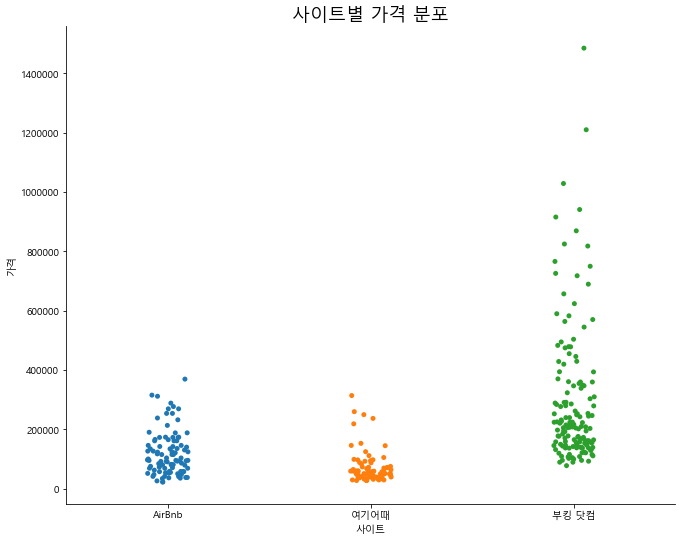

In [17]:
#ÏÇ¨Ïù¥Ìä∏Î≥Ñ Í∞ÄÍ≤© Î∂ÑÌè¨


g = sns.catplot(x="ÏÇ¨Ïù¥Ìä∏", y="Í∞ÄÍ≤©", data=hotels_df)
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p : format(int(x), '')))
plt.title("ÏÇ¨Ïù¥Ìä∏Î≥Ñ Í∞ÄÍ≤© Î∂ÑÌè¨", size=18)
g.fig.set_size_inches(10,8)

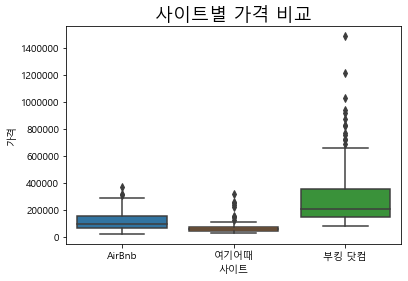

In [18]:
sns.boxplot(x="ÏÇ¨Ïù¥Ìä∏",y="Í∞ÄÍ≤©",data=hotels_df)
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p : format(int(x), '')))
plt.title("ÏÇ¨Ïù¥Ìä∏Î≥Ñ Í∞ÄÍ≤© ÎπÑÍµê", size=18)
g.fig.set_size_inches(10,8)

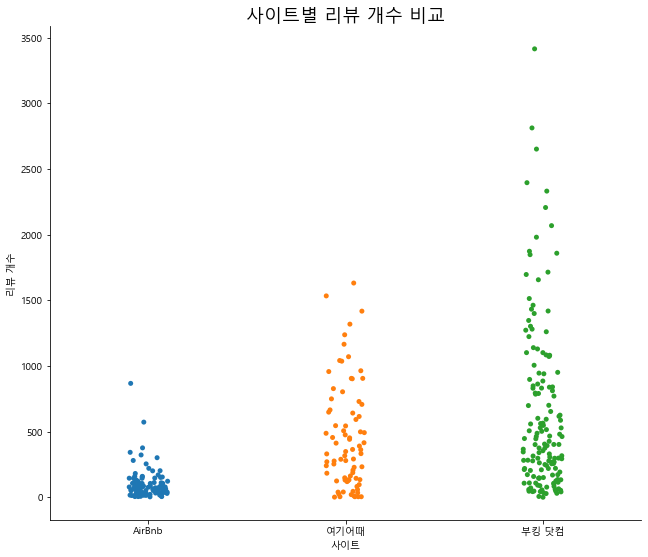

In [41]:
# ÏÇ¨Ïù¥Ìä∏Î≥Ñ Î¶¨Î∑∞ Í∞úÏàò


g = sns.catplot(x="ÏÇ¨Ïù¥Ìä∏", y="Î¶¨Î∑∞ Í∞úÏàò", data=hotels_df)
plt.title("ÏÇ¨Ïù¥Ìä∏Î≥Ñ Î¶¨Î∑∞ Í∞úÏàò ÎπÑÍµê", size=18)
g.fig.set_size_inches(10,8)

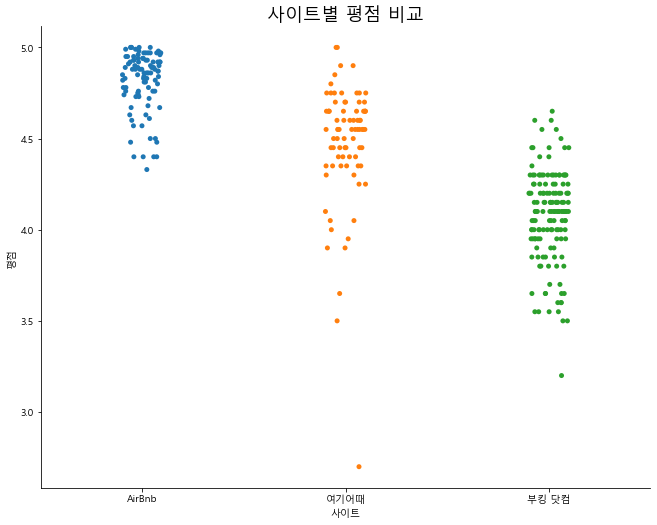

In [42]:
# ÏÇ¨Ïù¥Ìä∏Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨

g= sns.catplot(x="ÏÇ¨Ïù¥Ìä∏", y="ÌèâÏ†ê", data=hotels_df)
plt.title("ÏÇ¨Ïù¥Ìä∏Î≥Ñ ÌèâÏ†ê ÎπÑÍµê", size=18)
plt.tight_layout()
g.fig.set_size_inches(10,8)
plt.show()
#plt.ylim(0, 5)

Text(0.5, 1.0, 'Î≤ÑÎ∏î ÌÅ¨Í∏∞ : Î¶¨Î∑∞ Í∞úÏàò')

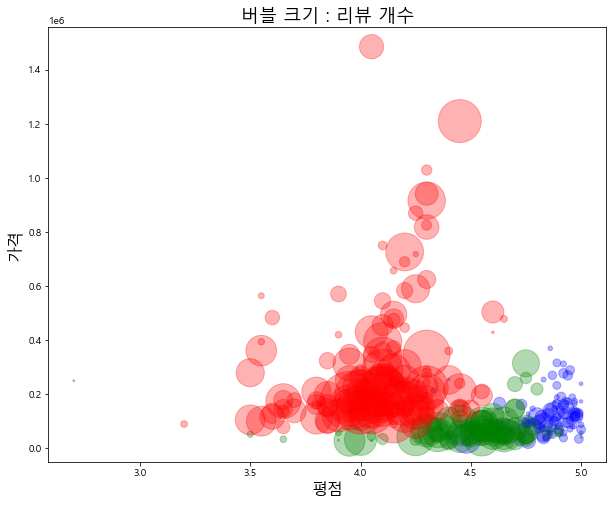

In [46]:
color = []

for i in range(len(hotels_df)):
    if hotels_df.iloc[i]['ÏÇ¨Ïù¥Ìä∏'] == 'AirBnb':
        color.append('b')
#    elif hotels_df.iloc[i]['ÏÇ¨Ïù¥Ìä∏'] == 'Ìò∏ÌÖîÏä§Îã∑Ïª¥':
#         color.append('y')
    elif hotels_df.iloc[i]['ÏÇ¨Ïù¥Ìä∏'] == 'Ïó¨Í∏∞Ïñ¥Îïå':
        color.append('g')
    elif hotels_df.iloc[i]['ÏÇ¨Ïù¥Ìä∏'] == 'Î∂ÄÌÇπ Îã∑Ïª¥':
        color.append('r')

 
plt.figure(figsize=(10,8)) 
plt.scatter('ÌèâÏ†ê', 'Í∞ÄÍ≤©',
             s='Î¶¨Î∑∞ Í∞úÏàò',
             c=color,
             alpha=0.3, data=hotels_df)
plt.xlabel("ÌèâÏ†ê", size=16)
plt.ylabel("Í∞ÄÍ≤©", size=16)
plt.title("Î≤ÑÎ∏î ÌÅ¨Í∏∞ : Î¶¨Î∑∞ Í∞úÏàò", size=18)

Text(0.5, 1.0, 'Í∞ÄÍ≤© vs ÌèâÏ†ê')

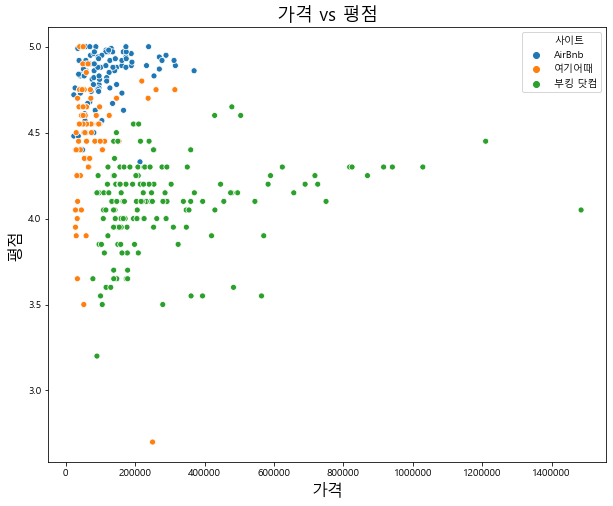

In [24]:
plt.figure(figsize=(10,8)) 
sns.scatterplot('Í∞ÄÍ≤©', 'ÌèâÏ†ê',hue="ÏÇ¨Ïù¥Ìä∏",
             data=hotels_df)
plt.gca().get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p : format(int(x), '')))
plt.xlabel("Í∞ÄÍ≤©", size=16)
plt.ylabel("ÌèâÏ†ê", size=16)
plt.title("Í∞ÄÍ≤© vs ÌèâÏ†ê", size=18)

In [51]:
print("Ïó¨Í∏∞Ïñ¥Îïå ÌèâÍ∑† ÌèâÏ†ê :",round(hotels_df[hotels_df["ÏÇ¨Ïù¥Ìä∏"]=="Ïó¨Í∏∞Ïñ¥Îïå"]["ÌèâÏ†ê"].mean(),2))
print("ÏóêÏñ¥ÎπÑÏï§ÎπÑ ÌèâÍ∑† ÌèâÏ†ê :",round(hotels_df[hotels_df["ÏÇ¨Ïù¥Ìä∏"]=="AirBnb"]["ÌèâÏ†ê"].mean(),2))
print("Î∂ÄÌÇπÎã∑Ïª¥ ÌèâÍ∑† ÌèâÏ†ê :",round(hotels_df[hotels_df["ÏÇ¨Ïù¥Ìä∏"]=="Î∂ÄÌÇπ Îã∑Ïª¥"]["ÌèâÏ†ê"].mean(),2))

Ïó¨Í∏∞Ïñ¥Îïå ÌèâÍ∑† ÌèâÏ†ê : 4.48
ÏóêÏñ¥ÎπÑÏï§ÎπÑ ÌèâÍ∑† ÌèâÏ†ê : 4.82
Î∂ÄÌÇπÎã∑Ïª¥ ÌèâÍ∑† ÌèâÏ†ê : 4.08


In [73]:
hotels_df["Í∞ÄÍ≤©"].median()

137700.0

In [89]:
hotels_df[hotels_df["Í∞ÄÍ≤©"]>=137700]

Ïù¥Î¶Ñ    ÌèâÏ†ê  Î¶¨Î∑∞ Í∞úÏàò      Í∞ÄÍ≤©  \
0                                              Ï†úÏ£ºÏïàÎú∞_ÏïàÏ±Ñ  4.88     34  146337   
1                             Ï†úÏ£ºÎèôÏ™Ω Ï†ïÍ∞àÌïú ÎèåÏßëÍ≥º Í∞ÄÎìúÎãùÏ∞ΩÍ≥†_Ïä§ÌÖåÏù¥Îµ§Îµ§  4.96     46  188544   
2                                              Ïä§ÌÖåÏù¥ ÏùºÎ©¥Ïãù  4.94     91  269569   
8                           ÏßëÏ†ÑÏ≤¥ÏóêÏÑú Î∞îÎã§ÏôÄ ÏÑ¨Ïù¥ Î≥¥Ïù¥Îäî ÎèÖÏ±ÑÏä§ÌÖåÏù¥ ÏàòÎ¶¨Îã¥  4.95     81  288824   
15    [Ïª§ÌîåÌäπÍ∞Ä][ÎÖ∏Ï≤úÌÉïÎ¨¥Î£å]ÌïòÎ£®ÌïòÎÇò Îçî ÎÖ∏Ïä§ÌÖîÏßÄÏïÑ _ ÌîÑÎùºÏù¥Îπó ÎÖ∏Ï≤úÌÉïÏù¥ ÏûàÎäî Í∞êÏÑ±Ïä§ÌÖå...  4.87     72  269569   
..                                                 ...   ...    ...     ...   
341                                       ÏãúÏõåÌÑ∞ Ïä§Ìåå Ìò∏ÌÖî ÏΩîÏûê  4.10    242  147000   
342                                          J2 Ìå®Î∞ÄÎ¶¨ Ìò∏ÌÖî  4.00    374  142500   
343                                            Ï∑®Îã§ÏÑ† Î¶¨Ï°∞Ìä∏  4.65     47  478500   
344                                              ÍµøÎç∞Ïù¥ÌéúÏÖò  4.55    220  210000   
346                                          Ï†úÏ£º Î™®Ïä¨Ìè¨ Ìò∏ÌÖî  3.65    133  138240   

        ÏÇ¨Ïù¥Ìä∏  
0    AirBnb  
1    AirBnb  
2    AirBnb  
8    AirBnb  
15   AirBnb  
..      ...  
341   Î∂ÄÌÇπ Îã∑Ïª¥  
342   Î∂ÄÌÇπ Îã∑Ïª¥  
343   Î∂ÄÌÇπ Îã∑Ïª¥  
344   Î∂ÄÌÇπ Îã∑Ïª¥  
346   Î∂ÄÌÇπ Îã∑Ïª¥  

[165 rows x 5 columns]

## ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Ïù¥Ïö©Ìïú Î¶¨Î∑∞ ÏãúÍ∞ÅÌôî


In [154]:
# Ìò∏ÌÖîÏä§Îã∑Ïª¥ Ìò∏ÌÖî ÎÇúÌÉÄ

url = "https://kr.hotels.com/ho659575-tr/?q-check-in=2021-01-07&q-check-out=2021-01-10&q-rooms=1&q-room-0-adults=2&SYE=3&ZSX=0&MGT=3&YGF=14&WOD=4&WOE=7&applyEmbargo=false&reviewTab=brand-reviews&f-amid="

url_parsed=urllib.parse.urlparse(url)

url_qs=urllib.parse.parse_qs(url_parsed.query)
url_qs

{'q-check-in': ['2021-01-07'],
 'q-check-out': ['2021-01-10'],
 'q-rooms': ['1'],
 'q-room-0-adults': ['2'],
 'SYE': ['3'],
 'ZSX': ['0'],
 'MGT': ['3'],
 'YGF': ['14'],
 'WOD': ['4'],
 'WOE': ['7'],
 'applyEmbargo': ['false'],
 'reviewTab': ['brand-reviews']}

In [155]:
base_url="https://kr.hotels.com/ho659575-tr/"
params={'q-check-in': ['2021-01-07'],
 'q-check-out': ['2021-01-10'],
 'q-rooms': ['1'],
 'q-room-0-adults': ['2'],
 'SYE': ['3'],
 'ZSX': ['0'],
 'MGT': ['3'],
 'YGF': ['14'],
 'WOD': ['4'],
 'WOE': ['7'],
 'applyEmbargo': ['false'],
 'reviewTab': ['brand-reviews']}

In [156]:
resp=requests.get(base_url,params=params)
resp

<Response [200]>

In [166]:
soup=bs(resp.text)


In [165]:
review_tag=soup.find_all("blockquote",class_="expandable-content description")


In [164]:
review_list=[]

for i in review_tag:
    review_list.append(i.text)
    
review_list

['Ï∂îÏ≤úÎ∞õÏïÑÏÑú ÏàôÎ∞ïÌïòÍ≤åÎêòÏóàÎäîÎç∞Ïöî\nÌò∏ÌÖîÎèÑ ÎÑàÎ¨¥ ÏòàÏÅòÍ≥† Ï†úÏ£ºÎèÑ ÏûàÏúºÎ©¥ÏÑú Í∞ÄÏû• ÎßòÏóêÎì† ÏàôÏÜåÏòÄÏñ¥Ïöî ÌôîÏû•Ïã§ÎèÑ Í∞ÄÏû• ÍπîÎÅîÌñàÍ≥† Ïπ®ÎåÄÍ∞Ä ÏóÑÏ≤≠ ÌëπÏã†ÌñàÏñ¥Ïöî ÎÇúÎ∞©ÏµúÍ≥†ÏòÄÏñ¥Ïöî Îã§ÏùåÏóê Îòê Ïó¨ÌñâÏùÑ Í∞ÑÎã§Î©¥ Íº≠ Îã§Ïãú Í∞ÄÍ≥†Ïã∂Ïñ¥Ïöî^^',
 'ÎëêÎ≤àÏß∏ Î∞©Î¨∏Ïù∏Îç∞ Ïù¥Î≤àÏóêÎèÑ ÎßåÏ°±Ïä§Îü¨Ïõ†Ïñ¥Ïöî. Ïö∞ÏÑ† ÏúÑÏπòÍ∞Ä ÌïúÏ†ÅÌïúÎç∞ ÏûàÍ≥† Ï°∞Ïö©Ìï¥ÏÑú Ï¢ãÏïÑÏöî! Ìè≠ÏÑ§Ïù¥ ÏôîÎäîÎç∞ ÏßÅÏõêÎ∂ÑÎì§Ïù¥ ÏπúÏ†àÌïòÍ≤å ÎààÎèÑ Îã§ ÏπòÏõåÏ£ºÏãúÍ≥† ÎààÍ∏∏Ïö¥Ï†ÑÎèÑ ÏïåÎ†§Ï£ºÏãúÍ≥† Í∞êÎèôÏù¥ÏóàÏäµÎãàÎã§. Î∞©ÎèÑ Íπ®ÎÅóÌïòÍ≥† Ïπ®ÎåÄÎèÑ Ìé∏ÌïòÍ≥† Î¨ºÎèÑ 2Î≥ë Ï§çÎãàÎã§! Îã§Îßå Ï°∞ÏãùÏùÄ Î≥ÑÎ°úÎùºÏÑú ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî Ï†úÏ£ºÎèÑ Í∞àÎïåÎßàÎã§ Î∞©Î¨∏Ìï†Í≤åÏöî!!',
 'Í∑∏ÎÉ• Í∑∏Îû¨Ïñ¥Ïöî vip Ïï°ÏÑ∏Ïä§ ÌòúÌÉùÎèÑ ÏóÜÍ≥† ÏÇ∞ÏÜçÏóê ÏûàÏñ¥ÏÑú ÏãºÎßõÏóê Î¨µÍ∏¥ ÌñàÏßÄÎßå Îã§ÏãúÎ¨µÏùÑ ÏùòÌñ•ÏùÄ ÏóÜÏñ¥Ïöî',
 'Î£∏ Ïª®ÎîîÏÖòÏù¥ Ìï≠ÏÉÅ Ï¢ãÏïÑÏö©:)',
 '',
 'Ï†úÏ£º Í≥µÌï≠ÏóêÏÑú Ï¢Ä Î©ÄÏßÄÎßå Ï°∞Ïö©ÌïòÍ≥† ÏæåÏ†ÅÌï®\nCOVID 19 ÏãúÎåÄÏóê.. Ï£ºÎ≥Ä ÏùåÏãùÏ†êÏù¥ Ï†ÑÌòÄ ÏóÜÏñ¥ Î∂àÌé∏ÌïòÏßÄÎßå Ì

In [251]:
# Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ ÌååÏùº csvÌååÏùºÌôî
pd.DataFrame(review_list).to_csv("review_list.csv",encoding="utf-8-sig")

PermissionError: [Errno 13] Permission denied: 'review_list.csv'

In [227]:
# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú Okt ÎùºÏù¥Î∏åÎü¨Î¶¨

from konlpy.tag import Okt

In [239]:
okt=Okt()

pos_list=[]

for review in review_list:
    pos_list.append(okt.pos(review))

pos_list=sum(pos_list,[])


morphs_list=[]

for token in pos_list:
    if token[1] in ("Noun","Adjective"):
        morphs_list.append(okt.morphs(token[0]))
        
morphs_list=sum(morphs_list,[])
morphs_list
        

['Ï∂îÏ≤ú',
 'ÏàôÎ∞ï',
 'Ìò∏ÌÖî',
 'ÏòàÏÅòÍ≥†',
 'Ï†úÏ£ºÎèÑ',
 'ÏûàÏúºÎ©¥ÏÑú',
 'Í∞ÄÏû•',
 'Îßò',
 'ÏàôÏÜå',
 'ÌôîÏû•Ïã§',
 'Í∞ÄÏû•',
 'ÍπîÎÅîÌñàÍ≥†',
 'Ïπ®ÎåÄ',
 'ÌëπÏã†ÌñàÏñ¥Ïöî',
 'ÎÇúÎ∞©',
 'ÏµúÍ≥†',
 'Îã§Ïùå',
 'Îòê',
 'Ïó¨Ìñâ',
 'Í∞ÑÎã§',
 'Íº≠',
 'Îã§Ïãú',
 'ÎëêÎ≤àÏß∏',
 'Î∞©Î¨∏',
 'Ïù¥Î≤à',
 'ÎßåÏ°±Ïä§Îü¨Ïõ†Ïñ¥Ïöî',
 'Ïö∞ÏÑ†',
 'ÏúÑÏπò',
 'ÌïúÏ†ÅÌïúÎç∞',
 'ÏûàÍ≥†',
 'Ï°∞Ïö©Ìï¥ÏÑú',
 'Ï¢ãÏïÑÏöî',
 'Ìè≠ÏÑ§',
 'ÏßÅÏõê',
 'ÏπúÏ†àÌïòÍ≤å',
 'Îàà',
 'ÎààÍ∏∏',
 'Ïö¥Ï†Ñ',
 'Í∞êÎèô',
 'Î∞©ÎèÑ',
 'Íπ®ÎÅóÌïòÍ≥†',
 'Ïπ®ÎåÄ',
 'Ìé∏ÌïòÍ≥†',
 'Î¨º',
 'Î≥ë',
 'Îã§Îßå',
 'Ï°∞Ïãù',
 'Î≥ÑÎ°ú',
 'ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî',
 'Ï†úÏ£ºÎèÑ',
 'Îïå',
 'Î∞©Î¨∏',
 'Í∑∏ÎÉ•',
 'Í∑∏Îû¨Ïñ¥Ïöî',
 'Ïï°ÏÑ∏Ïä§',
 'ÌòúÌÉù',
 'ÏóÜÍ≥†',
 'ÏÇ∞ÏÜç',
 'ÏûàÏñ¥ÏÑú',
 'Îßõ',
 'Îã§Ïãú',
 'Î¨µ',
 'ÏùòÌñ•',
 'ÏóÜÏñ¥Ïöî',
 'Î£∏',
 'Ïª®ÎîîÏÖò',
 'Ìï≠ÏÉÅ',
 'Ï¢ãÏïÑÏö©',
 'Ï†úÏ£º',
 'Í≥µÌï≠',
 'Ï¢Ä',
 'Î©ÄÏßÄÎßå',
 'Ï°∞Ïö©ÌïòÍ≥†',
 'ÏæåÏ†ÅÌï®',
 'ÏãúÎåÄ',
 'Ï£ºÎ≥Ä',
 'ÏùåÏãùÏ†ê',
 'Ï†ÑÌòÄ',
 'ÏóÜÏñ¥',
 'Î∂àÌé∏ÌïòÏßÄÎßå',
 'Ìò∏ÌÖî',
 'Î£∏ÏÑ

In [241]:
from collections import Counter

count = Counter(morphs_list)
words = dict(count.most_common())
words


{'Ìò∏ÌÖî': 15,
 'ÌïúÎùºÏÇ∞': 10,
 'Íπ®ÎÅóÌïòÍ≥†': 9,
 'ÎÉÑÏÉà': 9,
 'Îã§Îßå': 7,
 'Ï¢ãÏïòÏñ¥Ïöî': 7,
 'ÏàòÍ±¥': 7,
 'ÏàôÎ∞ï': 6,
 'ÏúÑÏπò': 6,
 'Ï¢ãÏïÑÏöî': 6,
 'Ï°∞Ïãù': 6,
 'ÏÉ§Ïõå': 6,
 'Í≥≥': 6,
 'Ï£ºÏ∞®Ïû•': 6,
 'ÏàôÏÜå': 5,
 'Îã§Ïùå': 5,
 'ÏûàÏñ¥ÏÑú': 5,
 'ÏûÖÎãàÎã§': 5,
 'Îì±Î∞ò': 5,
 'Ï¢ãÏïòÏäµÎãàÎã§': 5,
 'Îß§Ïö∞': 5,
 'Í∞ùÏã§': 5,
 'Ï†úÏ£ºÎèÑ': 4,
 'Î∞©Î¨∏': 4,
 'ÏßÅÏõê': 4,
 'Îïå': 4,
 'Í≥†Í∞ù': 4,
 'Ï†ÄÎÖÅ': 4,
 'Í∞ÄÍ≤©': 4,
 'ÎåÄÎπÑ': 4,
 'ÌÉÄÏõî': 4,
 'ÏÇ¨Ïö©': 4,
 'Í∞ÄÏÑ±': 4,
 'Ï≤≠Í≤∞': 4,
 'Ï≤≠ÏÜå': 4,
 'ÌõÑ': 4,
 'Ï∂îÏ≤ú': 3,
 'Ïπ®ÎåÄ': 3,
 'Îòê': 3,
 'Ïó¨Ìñâ': 3,
 'Íº≠': 3,
 'Îã§Ïãú': 3,
 'Î¨º': 3,
 'ÏÇ∞ÏÜç': 3,
 'Í≥µÌï≠': 3,
 'Ï¢Ä': 3,
 'Ï£ºÎ≥Ä': 3,
 'Î£∏ÏÑúÎπÑÏä§': 3,
 'ÎÇ†': 3,
 'ÏïΩ': 3,
 'ÏïÑÏ£º': 3,
 'ÎßàÏùå': 3,
 'ÏÑúÎπÑÏä§': 3,
 'Î∞©': 3,
 'ÎÇúÌÉÄ': 3,
 'ÏòàÏïΩ': 3,
 'ÏûàÏñ¥': 3,
 'ÎπÑ': 3,
 'Ïàò': 3,
 'Ïã§ÎÇ¥': 3,
 'Ï†ê': 3,
 'ÏãúÏÑ§': 3,
 'ÏπòÏïΩ': 3,
 'Ïπ´ÏÜî': 3,
 'ÏÜåÎ¶¨': 3,
 'ÏïÑÏπ®': 3,
 'ÏóÑÎßà': 3,
 'Ï†ïÎßê': 3,
 'Í≤É': 3,
 'Í±∞': 3,
 'ÏÉùÍ∞Å': 3,
 

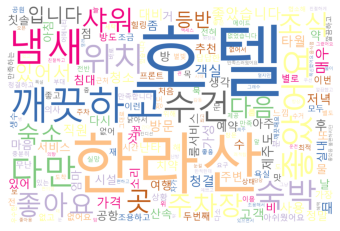

In [243]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

